# Welcome to our stock prediction notebook!
# In this notebook we are trying to predict closing price of the DJIA stock using the last 59 stock data and the opening price of the day from Yahoo Finance, and also the top 25 rated news of the current day from Reddit WorldNews Channel.

# The matirials for this project was taken from kaggle: https://www.kaggle.com/aaron7sun/stocknews?select=Combined_News_DJIA.csv
 
# In the next cell we are importing the libraries that we using in this project to manipulate the data.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# In the next cell we importing the data from our github project: https://github.com/Eliot100/DJIA-stock-project

In [2]:
df_RedditNews = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/RedditNews.csv')
df_DJIA = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/upload_DJIA_table.csv')
df_Combined_News_DJIA = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/Combined_News_DJIA.csv')
df_Combined_News_DJIA2 = pd.read_csv('https://raw.githubusercontent.com/ShreyamsJain/Stock-Price-Prediction-Model/master/Sentence_Polarity/combined_stock_data.csv')

In [3]:
df_Combined_News_DJIA2.head()

,Unnamed: 0,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Para,Subjectivity,Objectivity,Positive,Neutral,Negative
0,0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""","b""Georgia 'downs two Russian warplanes' as cou...",75.000000,25.000000,18.750000,25.000000,56.250000
1,1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",b'Why wont America and Nato help us? If they w...,83.333333,16.666667,41.666667,16.666667,41.666667
2,2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'

# In the cell below we copying the stock data, and normalize it.

In [4]:
scaler = MinMaxScaler(feature_range=(-1, 1))
df_DJIA2 = df_DJIA.copy()
df_DJIA2[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']] = \
  scaler.fit_transform(df_DJIA2[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']])
  
df_DJIA2.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,0.933579,0.940047,0.939734,0.938290,-0.778698,0.938290
1,2016-06-30,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995
2,2016-06-29,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995
3,2016-06-28,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554
4,2016-06-27,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745


# In the cell below we recognize the data. Every line contains stock data of 60 days in a row, the date of the stock data last day and top 25 rated news this day.

In [5]:
num_day_before = 30

In [6]:
df_Combined = df_DJIA2.copy()
for i in range(0,num_day_before):
  df_Combined[str(i+1)+" day before Open"] = ""
  df_Combined[str(i+1)+" day before High"] = ""
  df_Combined[str(i+1)+" day before Low"] = ""
  df_Combined[str(i+1)+" day before Close"] = ""
  df_Combined[str(i+1)+" day before Volume"] = ""
  df_Combined[str(i+1)+" day before Adj Close"] = ""

# for i in range(0,25):
#   df_Combined["Top"+str(i+1)] = ""

for j in range(0, df_DJIA2.shape[0]-num_day_before):
  for i in range(0, num_day_before):
    df_Combined[str(i+1)+" day before Open"][j] = df_Combined["Open"][j+i+1]
    df_Combined[str(i+1)+" day before High"][j] = df_Combined["High"][j+i+1]
    df_Combined[str(i+1)+" day before Low"][j] = df_Combined["Low"][j+i+1]
    df_Combined[str(i+1)+" day before Close"][j] = df_Combined["Close"][j+i+1]
    df_Combined[str(i+1)+" day before Volume"][j] = df_Combined["Volume"][j+i+1]
    df_Combined[str(i+1)+" day before Adj Close"][j] = df_Combined["Adj Close"][j+i+1]

# for i in range(0,25):
#   df_Combined["Top"+str(i+1)] = ""

# for i in range(0, df_DJIA2.shape[0]):
#   News_Date_array = df_RedditNews[df_RedditNews["Date"] == df_Combined["Date"][i]]["News"].to_numpy()
#   for j in range(0, News_Date_array.shape[0]):
#     df_Combined["Top"+str(j+1)][i] = News_Date_array[j]

df_Combined = df_Combined[:-num_day_before]
    
merged_dataframe = df_Combined_News_DJIA2[['Date', 'Label', 'Subjectivity', 'Objectivity', 'Positive', 'Negative', 'Neutral']].merge(df_Combined, how='inner', on='Date', left_index=True)
#Subjectivity	Objectivity	Positive	Neutral	Negative


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipyk

In [7]:
merged_dataframe.head(2)

,Date,Label,Subjectivity,Objectivity,Positive,Negative,Neutral,Open,High,Low,Close,Volume,Adj Close,1 day before Open,1 day before High,1 day before Low,1 day before Close,1 day before Volume,1 day before Adj Close,2 day before Open,2 day before High,2 day before Low,2 day before Close,2 day before Volume,2 day before Adj Close,3 day before Open,3 day before High,3 day before Low,3 day before Close,3 day before Volume,3 day before Adj Close,4 day before Open,4 day before High,4 day before Low,4 day before Close,4 day before Volume,4 day before Adj Close,5 day before Open,5 day before High,5 day before Low,...,24 day before Low,24 day before Close,24 day before Volume,24 day before Adj Close,25 day before Open,25 day before High,25 day before Low,25 day before Close,25 day before Volume,25 day before Adj Close,26 day before Open,26 day before High,26 day before Low,26 day before Close,26 day before Volume,26 day before Adj Close,27 day before Open,27 day before High,27 day before Low,27 day before Close,27 day before Volume,27 day before Adj Close,28 day before Open,28 day before High,28 day before Low,28 day before Close,28 day before Volume,28 day before Adj Close,29 day before Open,29 day before High,29 day before Low,29 day before Close,29 day before Volume,29 day before Adj Close,30 day before Open,30 day before High,30 day before Low,30 day before Close,30 day before Volume,30 day before Adj Close
1958,2008-09-22,0,25.000000,75.000000,0.0,25.000000,75.000000,-0.176175,-0.195143,-0.233686,-0.240372,-0.385456,-0.240372,-0.238531,-0.179945,-0.22784,-0.177008,0.940556,-0.177008,-0.309656,-0.249798,-0.323965,-0.239692,0.439288,-0.239692,-0.233591,-0.253085,-0.300841,-0.309394,0.364691,-0.309394,-0.259247,-0.246916,-0.275965,-0.233007,0.459393,-0.233007,-0.172444,-0.191386,-0.246343,...,-0.158801,-0.161547,-0.556256,-0.161547,-0.139331,-0.140975,-0.130738,-0.130862,-0.379964,-0.130862,-0.152781,-0.139533,-0.15596,-0.138337,-0.545753,-0.138337,-0.13566,-0.15405,-0.155544,-0.152441,-0.477457,-0.152441,-0.110356,-0.128526,-0.130435,-0.133825,-0.504344,-0.133825,-0.119198,-0.113965,-0.117893,-0.110047,-0.475537,-0.110047,-0.169772,-0.132373,-0.16661,-0.118212,-0.386596,-0.118212
1957,2008-09-23,0,33.333333,66.666667,0.0,33.333333,66.666667,-0.240540,-0.238328,-0.260504,-0.267829,-0.411652,-0.267829,-0.176175,-0.195143,-0.233686,-0.240372,-0.385456,-0.240372,-0.238531,-0.179945,-0.22784,-0.177008,0.940556,-0.177008,-0.309656,-0.249798,-0.323965,-0.239692,0.439288,-0.239692,-0.233591,-0.253085,-0.300841,-0.309394,0.364691,-0.309394,-0.259247,-0.246916,-0.275965,...,-0.178394,-0.183789,-0.510375,-0.183789,-0.131098,-0.144318,-0.158801,-0.161547,-0.556256,-0.161547,-0.139331,-0.140975,-0.130738,-0.130862,-0.379964,-0.130862,-0.152781,-0.139533,-0.15596,-0.138337,-0.545753,-0.138337,-0.13566,-0.15405,-0.155544,-0.152441,-0.477457,-0.152441,-0.110356,-0.128526,-0.130435,-0.133825,-0.504344,-0.133825,-0.119198,-0.113965,-0.117893,-0.110047,-0.475537,-0.110047


In [8]:
merged_dataframe.tail(2)

,Date,Label,Subjectivity,Objectivity,Positive,Negative,Neutral,Open,High,Low,Close,Volume,Adj Close,1 day before Open,1 day before High,1 day before Low,1 day before Close,1 day before Volume,1 day before Adj Close,2 day before Open,2 day before High,2 day before Low,2 day before Close,2 day before Volume,2 day before Adj Close,3 day before Open,3 day before High,3 day before Low,3 day before Close,3 day before Volume,3 day before Adj Close,4 day before Open,4 day before High,4 day before Low,4 day before Close,4 day before Volume,4 day before Adj Close,5 day before Open,5 day before High,5 day before Low,...,24 day before Low,24 day before Close,24 day before Volume,24 day before Adj Close,25 day before Open,25 day before High,25 day before Low,25 day before Close,25 day before Volume,25 day before Adj Close,26 day before Open,26 day before High,26 day before Low,26 day before Close,26 day before Volume,26 day before Adj Close,27 day before Open,27 day before High,27 day before Low,27 day before Close,27 day before Volume,27 day before Adj Close,28 day before Open,28 day before High,28 day before Low,28 day before Close,28 day before Volume,28 day before Adj Close,29 day before Open,29 day before High,29 day before Low,29 day before Close,29 day before Volume,29 day before Adj Close,30 day before Open,30 day before High,30 day before Low,30 day before Close,30 day before Volume,30 day before Adj Close
1,2016-06-30,1,100.0,0.0,100.0,0.0,0.0,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745,0.937385,0.930469,0.844743,0.845029,-0.308067,0.845029,0.919961,0.94154,0.927397,...,0.92057,0.917707,-0.818367,0.917707,0.901433,0.921034,0.908923,0.921654,-0.78764,0.921654,0.86576,0.895416,0.873355,0.896928,-0.765735,0.896928,0.862675,0.86245,0.865706,0.860699,-0.761804,0.860699,0.850827,0.866067,0.858465,0.862061,-0.689187,0.862061,0.863886,0.856173,0.840461,0.85092,-0.738579,0.85092,0.861697,0.877142,0.855227,0.866426,-0.78782,0.866426
0,2016-07-01,1,60.0,40.0,0.0,60.0,40.0,0.933579,0.940047,0.939734,0.938290,-0.778698,0.938290,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745,0.937385,0.930469,0.844743,...,0.924113,0.925345,-0.805614,0.925345,0.92258,0.92051,0.92057,0.917707,-0.818367,0.917707,0.901433,0.921034,0.908923,0.921654,-0.78764,0.921654,0.86576,0.895416,0.873355,0.896928,-0.765735,0.896928,0.862675,0.86245,0.865706,0.860699,-0.761804,0.860699,0.850827,0.866067,0.858465,0.862061,-0.689187,0.862061,0.863886,0.856173,0.840461,0.85092,-0.738579,0.85092


In [9]:
merged_final = merged_dataframe.dropna()

In [10]:
df_train = merged_final[merged_final['Date'] <= '20150101']
df_test = merged_final[merged_final['Date']  > '20150101']

X_train = df_train.drop(['Date', 'High', 'Low', 'Volume', 'Adj Close', 'Label'], axis=1)
Y_train = df_train['Close']

X_test = df_test.drop(['Date', 'High', 'Low', 'Volume', 'Adj Close', 'Label'], axis=1)
Y_test = df_test['Close']
Open_test = df_test['Open']
Dates = df_test.Date

In [11]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [12]:
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
testX = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from keras.layers.core import Dense, Activation, Dropout

In [14]:
model = Sequential()
model.add(LSTM( input_shape=(None, 187),  units=150,  return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Activation('linear'))
model.add(Dense( units=10))
model.add(Dense( units=1))

model.compile(loss='mse', optimizer='rmsprop',metrics=['accuracy'])

In [15]:
history = model.fit(trainX.tolist(), Y_train.tolist(), epochs=2500, validation_data=(testX.tolist(), Y_test.tolist()))

Streaming output truncated to the last 5000 lines.
Epoch 1/2500
58/58 [==============================] - 5s 29ms/step - loss: 0.0732 - accuracy: 2.7816e-05 - val_loss: 0.0543 - val_accuracy: 0.0000e+00
Epoch 2/2500
58/58 [==============================] - 1s 9ms/step - loss: 0.0115 - accuracy: 0.0014 - val_loss: 0.0098 - val_accuracy: 0.0000e+00
Epoch 3/2500
58/58 [==============================] - 1s 9ms/step - loss: 0.0085 - accuracy: 2.5923e-04 - val_loss: 0.0100 - val_accuracy: 0.0000e+00
Epoch 4/2500
58/58 [==============================] - 1s 9ms/step - loss: 0.0077 - accuracy: 3.2070e-04 - val_loss: 0.0157 - val_accuracy: 0.0000e+00
Epoch 5/2500
58/58 [==============================] - 1s 9ms/step - loss: 0.0072 - accuracy: 4.9242e-04 - val_loss: 0.0183 - val_accuracy: 0.0000e+00
Epoch 6/2500
58/58 [==============================] - 1s 9ms/step - loss: 0.0060 - accuracy: 2.7816e-05 - val_loss: 0.0076 - val_accuracy: 0.0000e+00
Epoch 7/2500
58/58 [==============================] 

In [16]:
import matplotlib.pyplot as plt
from sklearn import metrics

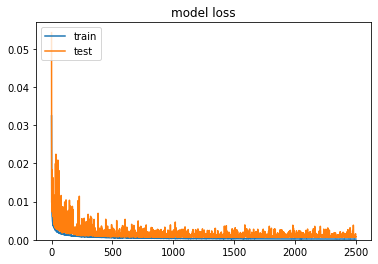

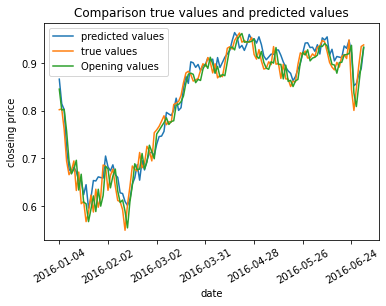

In [17]:
plt.title('model loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,None)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

predictions = model.predict(testX.tolist())

plt.title('Comparison true values and predicted values')
plt.plot(Dates.tolist(), predictions, label='predicted values')
plt.plot(Dates.tolist(), Y_test.tolist(), label='true values')
plt.plot(Dates.tolist(), Open_test.tolist(), label='Opening values')
plt.legend()
plt.xlabel('date')
plt.ylabel('closeing price')
plt.gca().set_xticks(Dates[::20])
plt.gca().set_xticklabels(Dates[::20], rotation=30)
plt.show()

In [19]:
MSE0 = np.square(np.subtract(Y_test.tolist(), Open_test.tolist())).mean()
print("loss zero:", MSE0)

loss zero: 0.0006653337740462189


In [20]:
arg_min = np.argmin(history.history['loss'])
min_loss = history.history['loss'][arg_min]
print("arg min:", arg_min)
print("min LSTM loss:", min_loss)

arg min: 2451
min LSTM loss: 0.00017363380175083876
